# Exercici 1

Agafa un conjunt de dades d'un tema que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [31]:
df = pd.read_csv("Crop_recommendation.csv")
#source: https://www.kaggle.com/datasets/78c7595cbf5a98a8cc488e5b9f6911f216680e5a221e6704ba7be4d7ef42c753

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.shape

(2200, 8)

In [8]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

This dataset gathers data about agricultural parameters, such as soil concentrations of nitrogen (N), phosphorous (P), and potassium (K), soil temperature in Celsius degrees, pH, where less than 7 is considered as acidic, more than 7 is considered basic, and at 7 it is considered as neutral, humidity, rainfall, and type of crop(label). The different types of crop are rice, maize, chickpeas, kidney beans, pigeon peas, moth beans, mung beans, blackgram, lentils, pomegranate, banana, mango, grapes, watermelon, muskmelon, apple, orange, papaya, coconut, cotton, jute, and coffee.

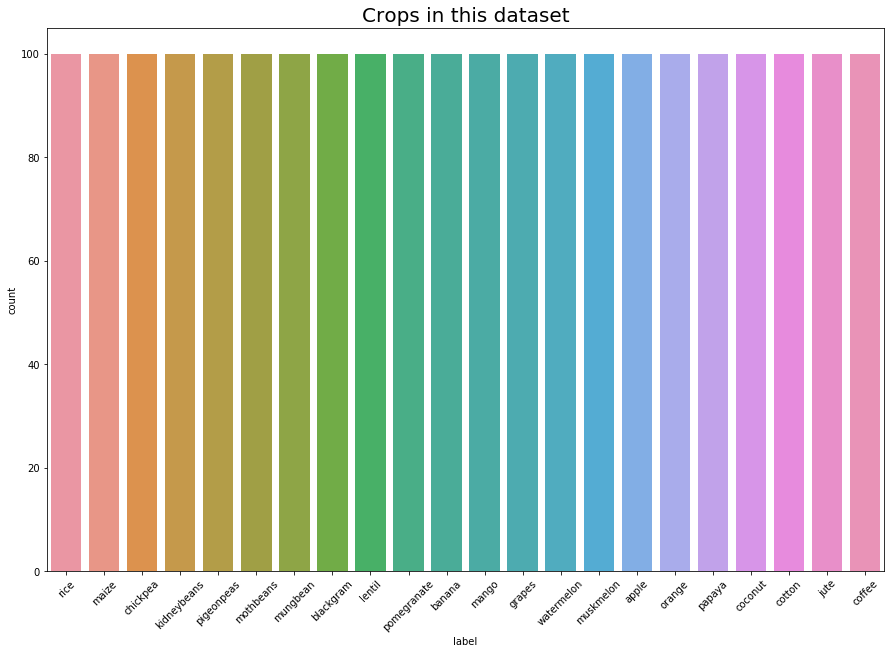

In [38]:
plt.figure(figsize = (15, 10))
plt.xticks(rotation = 45)
plt.title("Crops in this dataset", fontsize = 20)
sns.countplot(df.label)

As we can see, all types of crops in this dataset are equally represented. 

In [49]:
#create dummys for the atribute label
dummy = pd.get_dummies(df.label)

In [14]:
dummy.head()

,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
#adding the dummies to the main dataset
df = pd.concat([df, dummy], axis = 1) 

In [16]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,apple,banana,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
#standarizing numeric atributes
x = df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]]
x = StandardScaler().fit_transform(x)

In [29]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,apple,banana,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,rice,0,0,...,0,0,0,0,0,0,0,0,1,0


# Exercici 2

Continua amb el conjunt de dades i aplica l'anàlisi de components principals.

Text(0, 0.5, 'cumulative explained variance')

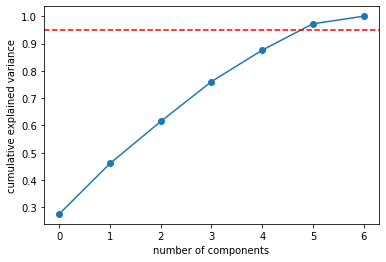

In [56]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "o")
plt.axhline(0.95, color = "r", linestyle = "--")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

[Text(0.5, 1, 'Correlations')]

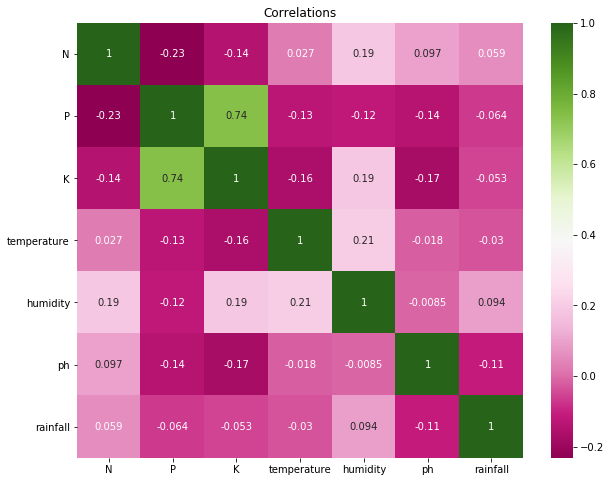

In [62]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = "PiYG").set(title = "Correlations")

In [43]:
pca_components = PCA(n_components = 2).fit_transform(x)

In [46]:
pca_df = pd.DataFrame(data = pca_components, columns = ["principal component 1", "principal component 2"])
pca_df.head()

,principal component 1,principal component 2
0,-0.582869,-0.844586
1,-0.474635,-0.784895
2,-0.634068,-0.694522
3,-1.047920,-1.087658
4,-0.873258,-0.658673


In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [53]:
final_df = pd.concat([pca_df, dummy], axis = 1)
final_df.head()

,principal component 1,principal component 2,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,-0.582869,-0.844586,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.474635,-0.784895,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.634068,-0.694522,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-1.047920,-1.087658,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.873258,-0.658673,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
